# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data

In [2]:
border_data = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [3]:
border_data.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [4]:
border_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


In [5]:
len(border_data['Port Name'].unique().tolist()) #116 unique port values

116

In [6]:
border_data['Border'].value_counts(normalize=True)

US-Canada Border    0.767453
US-Mexico Border    0.232547
Name: Border, dtype: float64

# Visualization

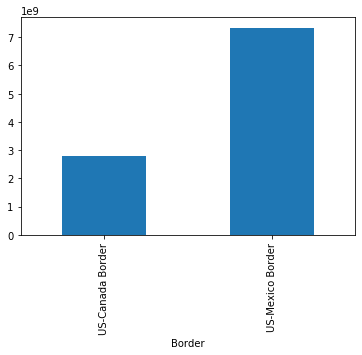

In [7]:
border_data.groupby('Border')['Value'].sum().plot(kind='bar') 

Maximum crossings happen at the US-Mexico Border

In [8]:
border_data['Date'] = pd.to_datetime(border_data['Date'])

In [9]:
border_data.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
dtype: object

In [10]:
border_data['Year'] = border_data['Date'].dt.year

In [11]:
border_data['Month'] = border_data['Date'].dt.month

In [12]:
border_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month
0,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicle Passengers,1414,2020,2
1,Alcan,AK,3104,US-Canada Border,2020-02-01,Personal Vehicles,763,2020,2
2,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Empty,412,2020,2
3,Alcan,AK,3104,US-Canada Border,2020-02-01,Truck Containers Full,122,2020,2
4,Alcan,AK,3104,US-Canada Border,2020-02-01,Trucks,545,2020,2


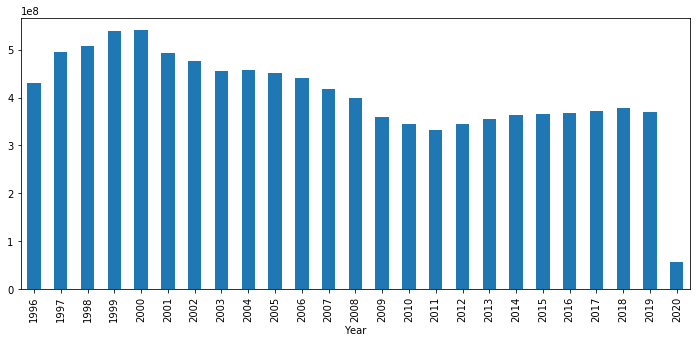

In [13]:
#the value tends to be decreasing, maybe policies would have been made stricter
border_data.groupby('Year')['Value'].sum().plot(kind='bar',figsize=(12,5))

The value saw an uptrend from 1996-2000 but tends to be decreasing after that, maybe policies would have been made stricter at the borders

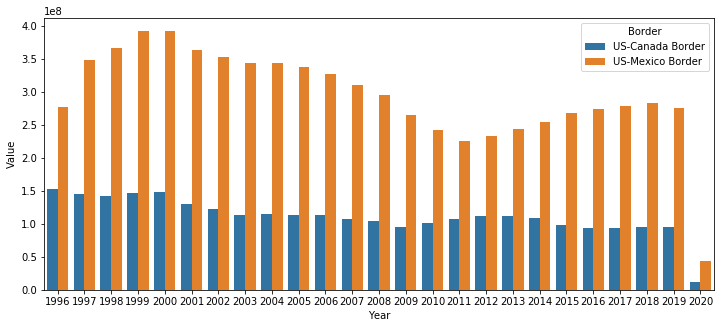

In [14]:
#1.reset_index is necessary to create a dataframe of which the column can be used in the plots
#2. to separte the data on the basis of borders, have grouped with 2 indexex
plt.figure(figsize=(12,5))
data_border = border_data.groupby(['Year','Border'])['Value'].sum().reset_index()#.plot(kind='bar',figsize=(12,5))
sns.barplot('Year', 'Value', data = data_border, hue='Border' )


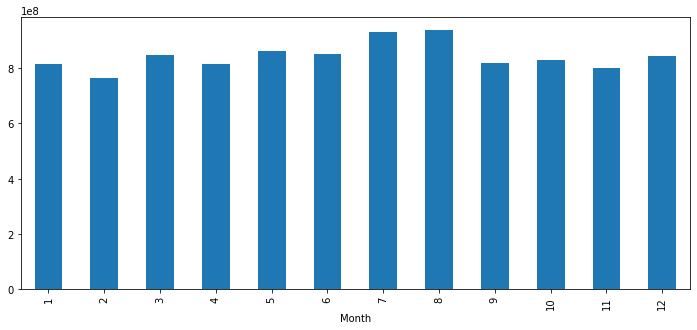

In [15]:
#not much of a difference but more in 7 &8 month
border_data.groupby('Month')['Value'].sum().plot(kind='bar',figsize=(12,5))

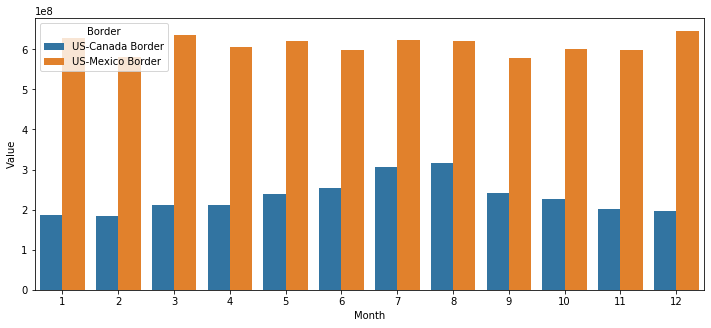

In [16]:
#in both the borders the inflow looks similar in the month of 7&8
plt.figure(figsize=(12,5))
data_border = border_data.groupby(['Month','Border'])['Value'].sum().reset_index()
sns.barplot('Month', 'Value', data = data_border, hue='Border' )

Both the borders experience the increase in the month of July and August, but there is not much difference over the month wise crossings 

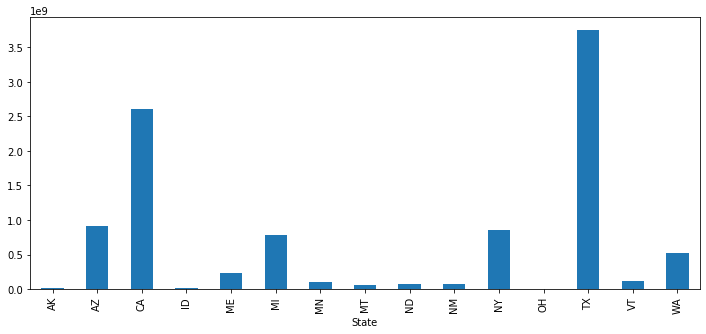

In [17]:
#majority are from two states CA and TX
border_data.groupby('State')['Value'].sum().plot(kind='bar',figsize=(12,5))

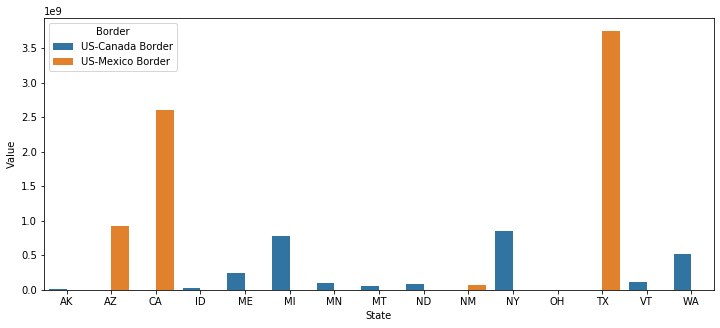

In [18]:
#check again
plt.figure(figsize=(12,5))
data_border = border_data.groupby(['State','Border'])['Value'].sum().reset_index()
sns.barplot('State', 'Value', data = data_border, hue='Border' )

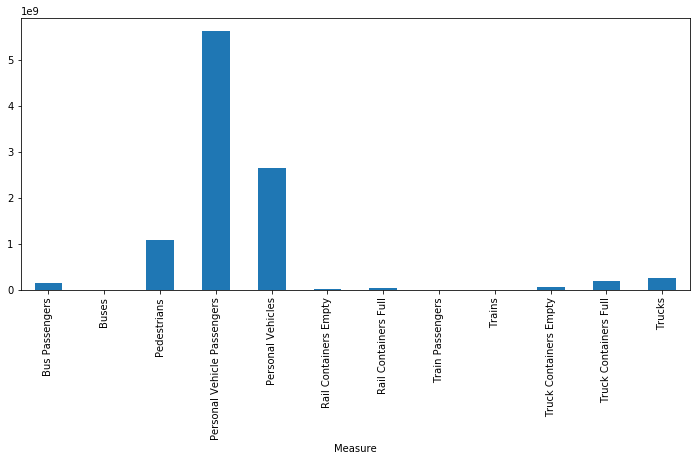

In [19]:
#Personal vehicles 
border_data.groupby('Measure')['Value'].sum().plot(kind='bar',figsize=(12,5))

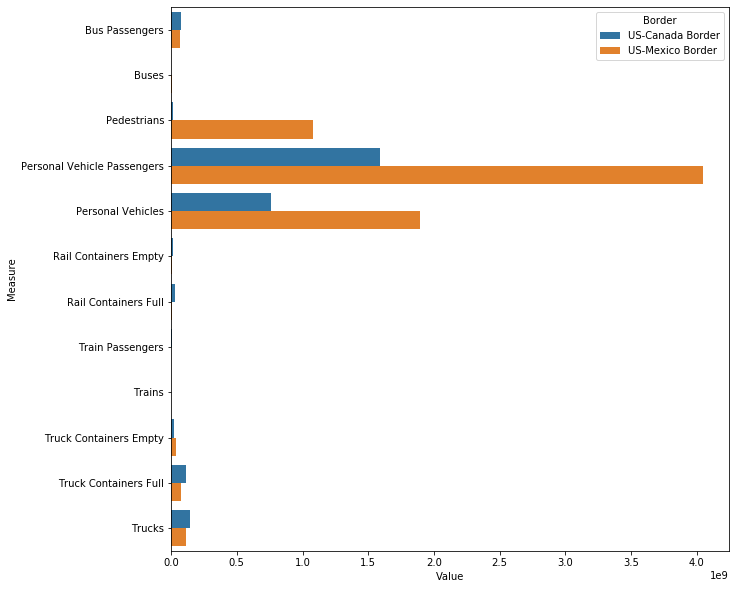

In [20]:
#both the border crossing gernerally happend on same type of carriers
plt.figure(figsize=(10,10))
data_border = border_data.groupby(['Measure','Border'])['Value'].sum().reset_index()
sns.barplot('Value', 'Measure', data = data_border, hue='Border' )

The border crossing gernerally happens on two types of carriers majorly -  Personal Vehicle Passengers and Personal Vehicles

In [21]:
border_data = border_data.drop('Date',axis=1) #does not seems to be an important feature

In [22]:
border_data.head()

,Port Name,State,Port Code,Border,Measure,Value,Year,Month
0,Alcan,AK,3104,US-Canada Border,Personal Vehicle Passengers,1414,2020,2
1,Alcan,AK,3104,US-Canada Border,Personal Vehicles,763,2020,2
2,Alcan,AK,3104,US-Canada Border,Truck Containers Empty,412,2020,2
3,Alcan,AK,3104,US-Canada Border,Truck Containers Full,122,2020,2
4,Alcan,AK,3104,US-Canada Border,Trucks,545,2020,2


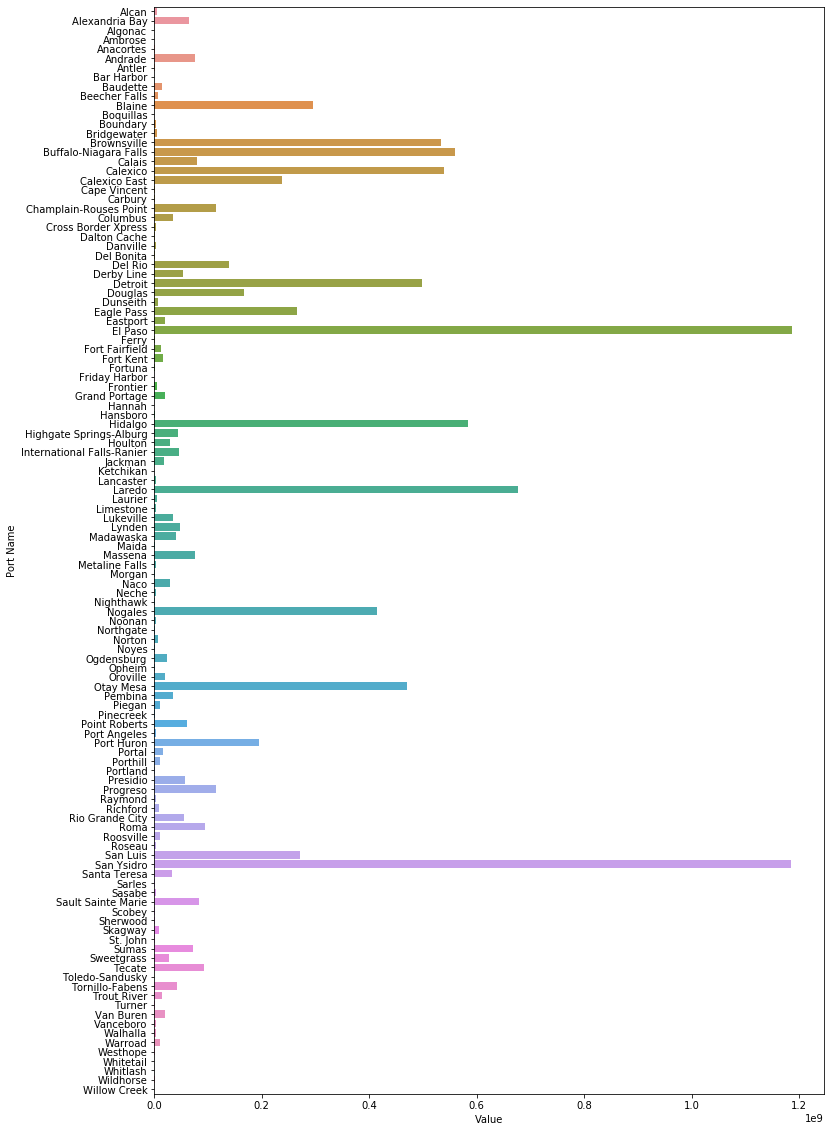

In [23]:
plt.figure(figsize=(12,20))
data = border_data.groupby(['Port Name'])['Value'].sum().reset_index()
sns.barplot('Value','Port Name', data=data)


The busiest ports seems to be El-Paso and San ysidro ports

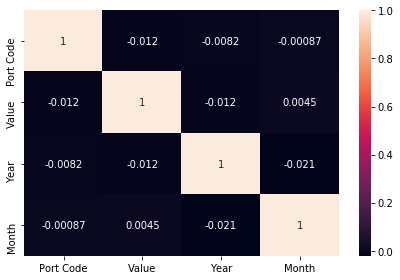

In [33]:
ax=sns.heatmap(border_data.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()